In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
    
import sys
sys.path.insert(0, '/home/dhruv/codebase/pyLDLE2/')
sys.path.insert(0, '..')

In [3]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets, buml_
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.sparse.linalg import svds
import bx_util

matplotlib.get_backend() =  module://ipympl.backend_nbagg


In [4]:
vis = visualize_.Visualize()

In [5]:
ex_name = '../figures/final_figures/heteroskedastic_annulus_NEW_high_amb'

In [6]:
X0_, labelsMat0, ddX0 = datasets.Datasets().circular_disk_uniform(n=10000, noise=1e-12)

X.shape =  (7837, 3)


In [7]:
r = np.linalg.norm(X0_[:,:2], axis=1)
mask = r > 0.3*np.max(r)
X0 = X0_[mask,:2]
theta = np.arctan2(X0[:,1], X0[:,0])

In [8]:
r0 = r[mask]
ddX = np.minimum(np.max(r) - r0, r0 - 0.3*np.max(r))

In [9]:
m=2000
np.random.seed(42)
O_rand, _, _ = svds(np.random.normal(0,1,(m,2+1)), 2)
X_ = X0.dot(O_rand.T)

In [10]:
np.random.seed(42)
noise_r = 0.01 + 0.2*(1+np.cos(2*theta))/2
noise = np.random.normal(0, 1, X_.shape)
noise = noise/(np.linalg.norm(noise, axis=1)[:,None])
noise = noise - noise.dot(O_rand).dot(O_rand.T)
noise = noise_r[:,None]*noise
X = X_ + noise

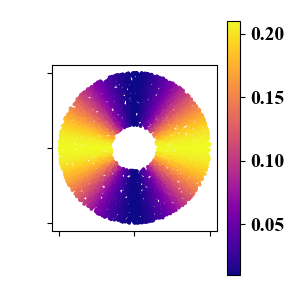

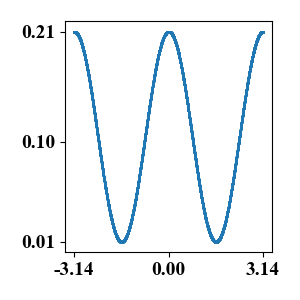

In [11]:
vis.data(X.dot(O_rand), noise_r, cmap='plasma', figsize=(3,3), s=10, title=None, colorbar=True)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig(ex_name + '_noise.pdf', dpi=400)

import matplotlib.ticker as ticker
plt.figure(figsize=(3,3))
plt.scatter(theta, noise_r, s=3)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.xticks([-np.pi, 0, np.pi])
plt.yticks([0.01, np.max(noise_r)/2, np.max(noise_r)])
plt.tight_layout()
plt.savefig(ex_name + '_noise_curve.pdf', dpi=400)

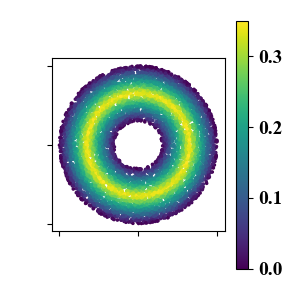

In [12]:
vis.data(X.dot(O_rand), ddX, cmap='viridis', figsize=(3,3), s=10, title=None, colorbar=True)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig(ex_name + '_ddX.pdf', dpi=400)

In [13]:
np.sum(np.abs(X0 - X.dot(O_rand)))

1.7452155172403838e-12

In [14]:
np.sum(np.abs(X - X.dot(O_rand).dot(O_rand.T)))

27777.63741109766

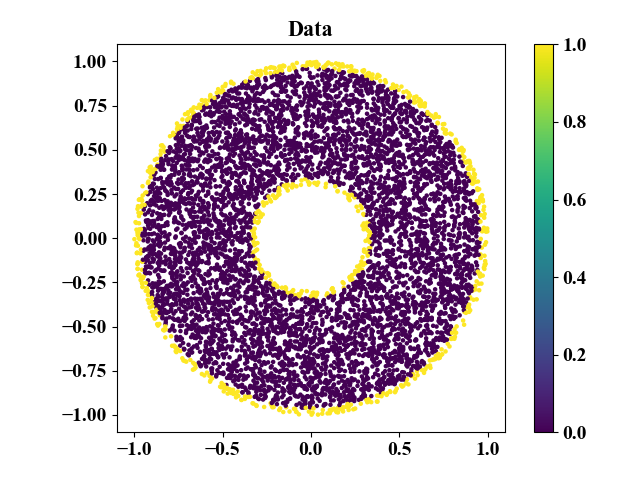

In [15]:
max_prctile = 100*np.sum(ddX<0.04)/len(ddX)
vis.data(X0, ddX<np.percentile(ddX, max_prctile), cmap='viridis', colorbar=True)
plt.savefig(ex_name + '_dX.png')

In [16]:
max_prctile

10.924250989259468

In [17]:
labelsMat = X0

In [18]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = None
opts['d'] = 2
bx_ds, bx_init_ds, W_ds, D_ds, nu_norm_ds = bx_util.estimate_bx(X, opts=opts)

Error: 0.3405443753290285
Error: 0.024049451922969478
Error: 0.002287128509109282
Error: 0.00024399975516842254
Error: 2.7486416059541163e-05
Error: 3.173676512480128e-06
Error: 3.720891407210658e-07
Error: 4.4082902217468245e-08
Error: 5.26188448368714e-09
Error: 6.315674649925995e-10
Error: 7.612577235249773e-11
Error: 9.206857498611498e-12
Error: 1.11655129586552e-12
Error: 1.361133428190442e-13
Error: 1.6542323066914832e-14
Error: 2.4424906541753444e-15
Error: 5.551115123125783e-16
Sinkhorn converged at iter: 17


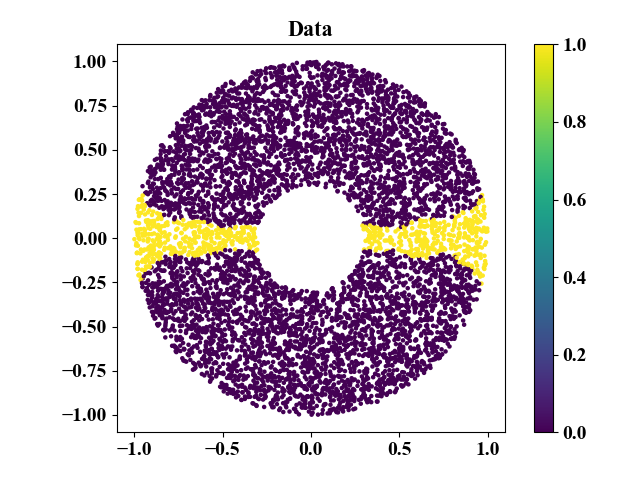

In [19]:
vis.data(labelsMat, bx_ds<np.percentile(bx_ds, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [20]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
opts['d'] = 2
bx_ds_lpca, bx_init_ds_lpca, W_ds_lpca, D_ds_lpca, nu_norm_ds_lpca = bx_util.estimate_bx(X, opts=opts)

Error: 0.3405443753290285
Error: 0.024049451922969478
Error: 0.002287128509109282
Error: 0.00024399975516842254
Error: 2.7486416059541163e-05
Error: 3.173676512480128e-06
Error: 3.720891407210658e-07
Error: 4.4082902217468245e-08
Error: 5.26188448368714e-09
Error: 6.315674649925995e-10
Error: 7.612577235249773e-11
Error: 9.206857498611498e-12
Error: 1.11655129586552e-12
Error: 1.361133428190442e-13
Error: 1.6542323066914832e-14
Error: 2.4424906541753444e-15
Error: 5.551115123125783e-16
Sinkhorn converged at iter: 17


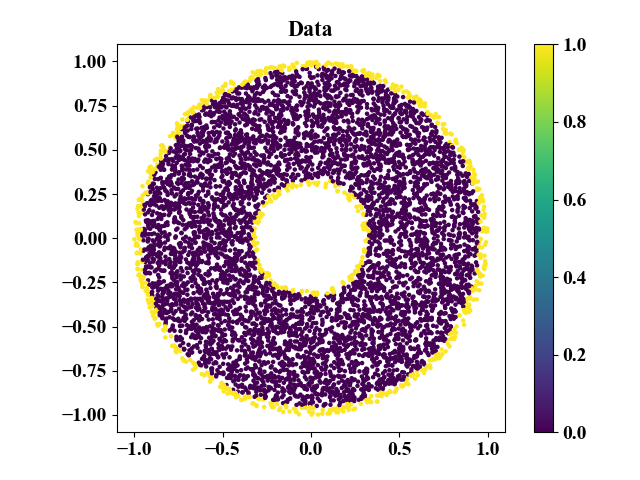

In [21]:
vis.data(labelsMat, bx_ds_lpca<np.percentile(bx_ds_lpca, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [22]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
bx_berry_sauer_w_lpca, bx_berry_sauer_init_w_lpca, nu_norm_berry_sauer_w_lpca = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

Error at iter: 0 is: 0.08856932944153402
newton method converged at iter: 4


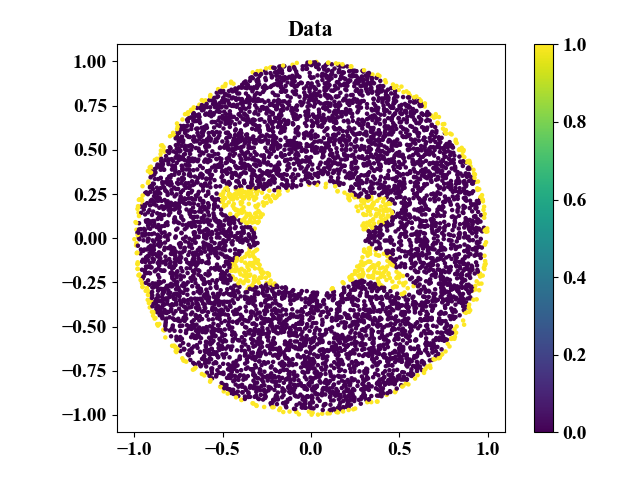

In [23]:
vis.data(labelsMat, bx_berry_sauer_w_lpca<np.percentile(bx_berry_sauer_w_lpca, max_prctile), cmap='viridis', colorbar=True)

In [24]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
bx_berry_sauer, bx_berry_sauer_init, nu_norm_berry_sauer = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

Error at iter: 0 is: 0.08842117633709008
newton method converged at iter: 4


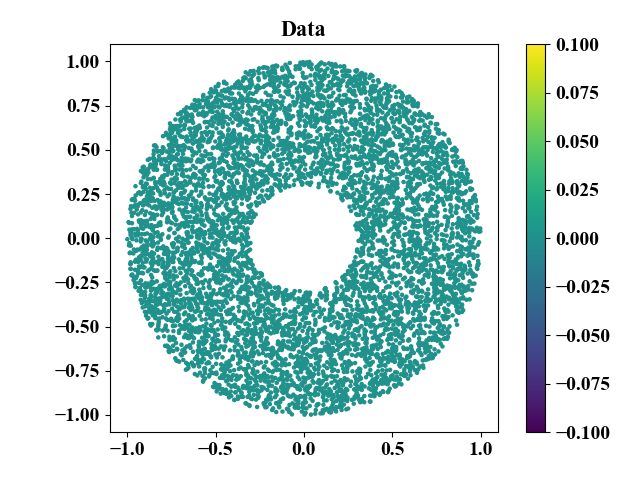

In [25]:
vis.data(labelsMat, bx_berry_sauer<np.percentile(bx_berry_sauer, max_prctile), cmap='viridis', colorbar=True)

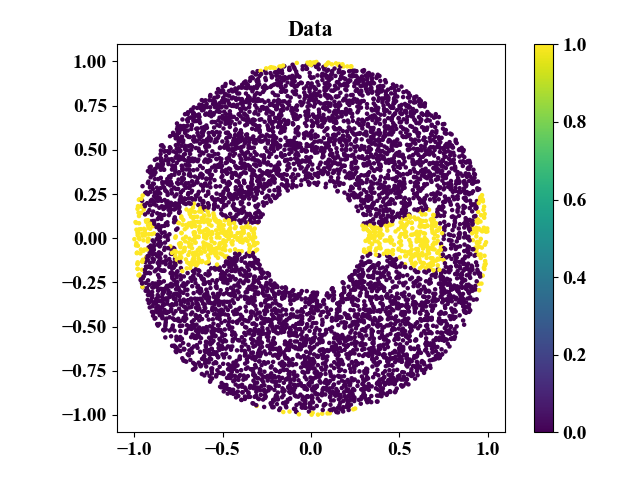

In [26]:
import graphlearning as gl
k_nn = 256
bx_CPS = gl.utils.boundary_statistic(X, k_nn, knn=True)
vis.data(labelsMat, bx_CPS<np.percentile(bx_CPS, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [27]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
opts['d'] = 2
opts['no_newton'] = False
opts['optimizer'] = 'gd'
opts['lr'] = 0.1
opts['reg'] = 0.001
bx_ds_lpca_smooth, bx_init_ds_lpca_smooth, W_ds_lpca_smooth, D_ds_lpca_smooth, nu_norm_ds_lpca_smooth = bx_util.estimate_bx(X, opts=opts)

Error: 0.3405443753290285
Error: 0.024049451922969478
Error: 0.002287128509109282
Error: 0.00024399975516842254
Error: 2.7486416059541163e-05
Error: 3.173676512480128e-06
Error: 3.720891407210658e-07
Error: 4.4082902217468245e-08
Error: 5.26188448368714e-09
Error: 6.315674649925995e-10
Error: 7.612577235249773e-11
Error: 9.206857498611498e-12
Error: 1.11655129586552e-12
Error: 1.361133428190442e-13
Error: 1.6542323066914832e-14
Error: 2.4424906541753444e-15
Error: 5.551115123125783e-16
Sinkhorn converged at iter: 17
Iter: 1 :: loss: 0.06257210010994058
Iter: 2 :: loss: 0.06240652530281448
Iter: 3 :: loss: 0.06224196722412413
Iter: 4 :: loss: 0.06207841593138397
Iter: 5 :: loss: 0.06191586161532505
Iter: 6 :: loss: 0.06175429459763073
Iter: 7 :: loss: 0.06159370532871913
Iter: 8 :: loss: 0.06143408438557078
Iter: 9 :: loss: 0.06127542246960098
Iter: 10 :: loss: 0.061117710404575136
Iter: 11 :: loss: 0.06096093913456663
Iter: 12 :: loss: 0.06080509972195579
Iter: 13 :: loss: 0.0606501833

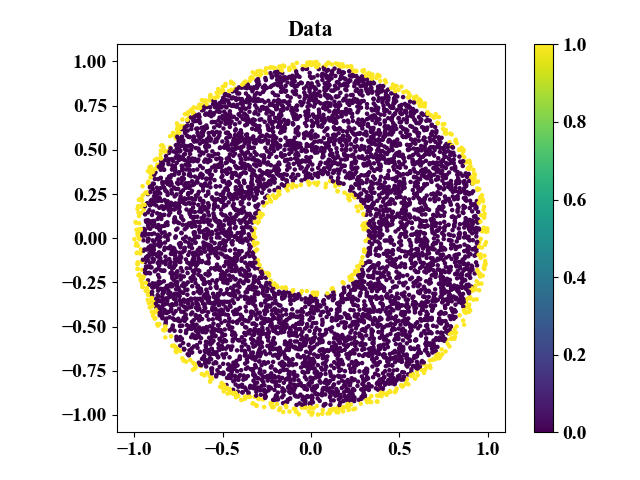

In [28]:
vis.data(labelsMat, bx_ds_lpca_smooth<np.percentile(bx_ds_lpca_smooth, max_prctile), cmap='viridis', colorbar=True)

In [29]:
prctiles = np.arange(2, 14, 1)
jac_ind_bs_lpca = []
jac_ind_bs = []
jac_ind_ds_lpca = []
jac_ind_ds_lpca_smooth = []
jac_ind_ds = []
jac_ind_cps = []

for prctile in prctiles:
    jac_ind_ds_lpca.append(bx_util.compute_jaccard_index(ddX, bx_ds_lpca, prctile))
    jac_ind_ds_lpca_smooth.append(bx_util.compute_jaccard_index(ddX, bx_ds_lpca_smooth, prctile))
    jac_ind_ds.append(bx_util.compute_jaccard_index(ddX, bx_ds, prctile))
    jac_ind_bs_lpca.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer_w_lpca, prctile))
    jac_ind_bs.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer, prctile))
    jac_ind_cps.append(bx_util.compute_jaccard_index(ddX, bx_CPS, prctile))

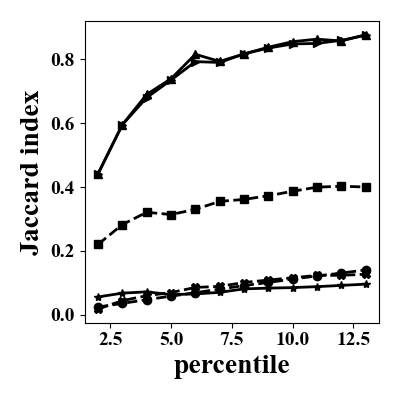

In [30]:
plt.figure(figsize=(4,4))
plt.plot(prctiles, jac_ind_ds_lpca, '-k^', label='DS + LPCA', linewidth=2)
plt.plot(prctiles, jac_ind_ds_lpca_smooth, '-k>', label='Standard + LPCA + Smooth', linewidth=2)
plt.plot(prctiles, jac_ind_ds, '-k*', label='DS', linewidth=2)
plt.plot(prctiles, jac_ind_bs_lpca, '--ks', label='Standard + LPCA', linewidth=2)
plt.plot(prctiles, jac_ind_bs, '--ko', label='Standard', linewidth=2)
plt.plot(prctiles, jac_ind_cps, '--kX', label='CPS', linewidth=2)
plt.xlabel('percentile', fontsize=20)
plt.ylabel('Jaccard index', fontsize=20)
plt.tight_layout()
#plt.legend(framealpha=0)
plt.savefig(ex_name + '_result_1.png', dpi=400)

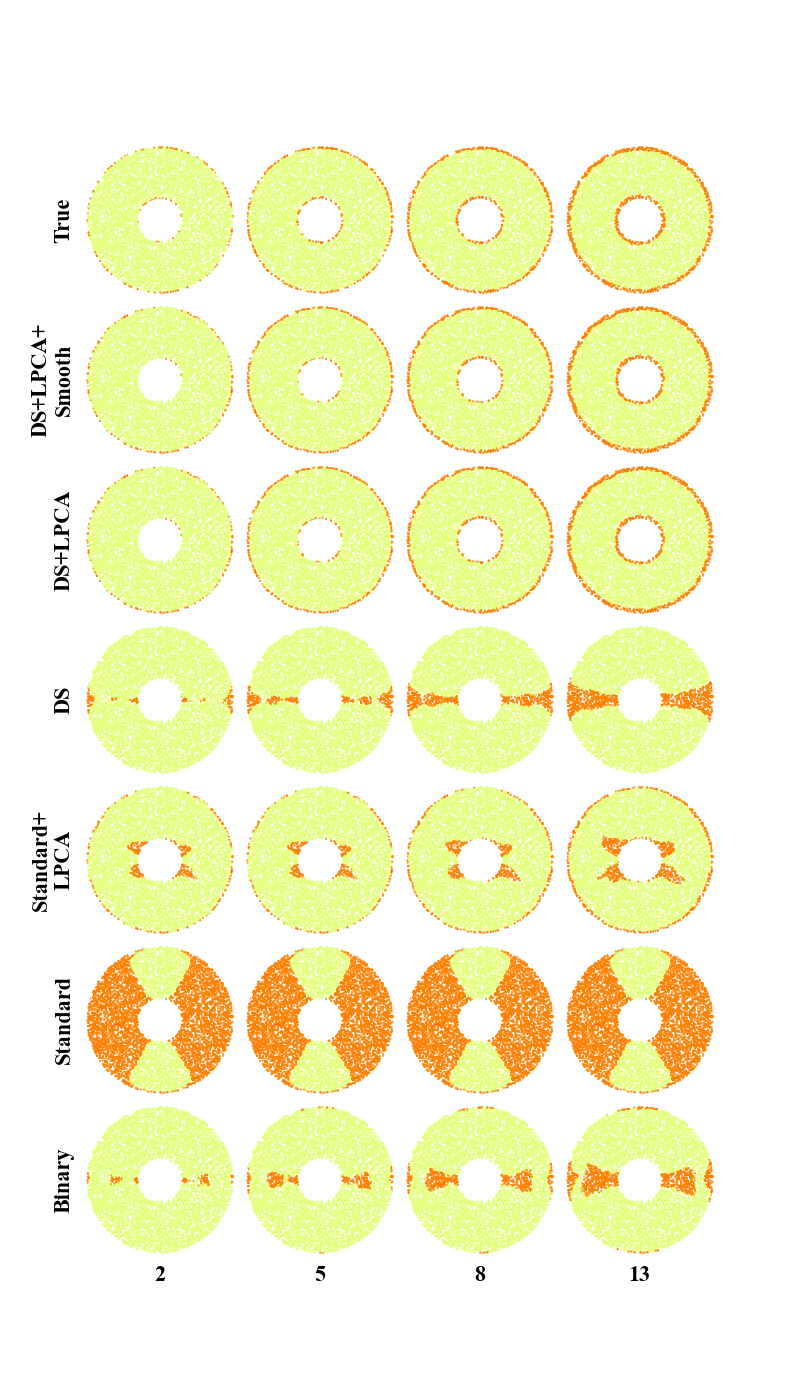

In [31]:
prctiles_ = [prctiles[0]] + prctiles[3:-3:3].tolist() + [prctiles[-1]]
bx_estimates = [
    ddX,
    bx_ds_lpca_smooth,
    bx_ds_lpca,
    bx_ds,
    bx_berry_sauer_w_lpca,
    bx_berry_sauer,
    bx_CPS
]
#ylabels = ['$\\text{True}$', '$\\text{DS+LPCA}$', '$\\text{DS}$', '$\\text{Standard+}$\n$\\text{LPCA}$', '$\\text{Standard}$']
ylabels = ['True', 'DS+LPCA+\nSmooth', 'DS+LPCA', 'DS', 'Standard+\nLPCA', 'Standard', 'Binary']
fig_h = 2
cmap = 'Wistia'
n_bx_estimates = len(bx_estimates)
n_percentiles = len(prctiles_)
fig, ax = plt.subplots(n_bx_estimates, n_percentiles, figsize=(n_percentiles*fig_h,n_bx_estimates*fig_h))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=0)
for i in range(n_bx_estimates):
    for j in range(n_percentiles):
        thresh = np.percentile(bx_estimates[i], prctiles_[j])
        ax[i,j].scatter(*labelsMat.T, c=bx_estimates[i]<=thresh, cmap=cmap, s=1, vmin=0, vmax=1)
        if j == 0:
            ax[i,j].set_ylabel(ylabels[i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines[['left', 'right', 'top', 'bottom']].set_visible(False)

for j in range(n_percentiles):
    ax[-1,j].set_xlabel(str(prctiles_[j]))

plt.savefig(ex_name + '_result_2.png', dpi=400)

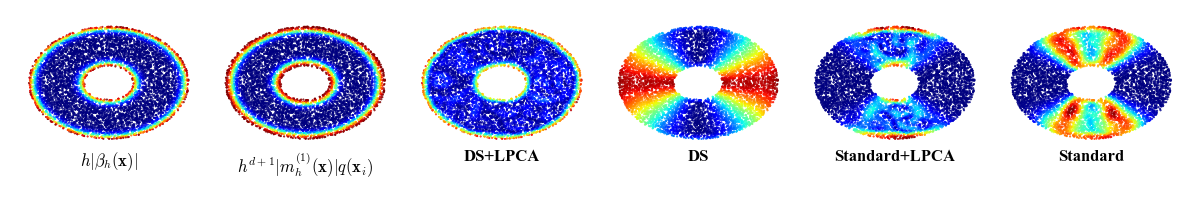

In [33]:
nu_norm_true1 = -opts['h']*bx_util.compute_beta(ddX, opts['h'])
nu_norm_true2 = -(opts['h']**(opts['d']+1))*bx_util.compute_m1(ddX, opts['h'])
nu_norm_estimates = [
    nu_norm_true1,
    nu_norm_true2,
    nu_norm_ds_lpca_smooth,
    nu_norm_ds_lpca,
    nu_norm_ds,
    nu_norm_berry_sauer_w_lpca,
    nu_norm_berry_sauer
]
# xlabels = ['$h\\xi_h(\\mathbf{x})/|m_{h}^{(1)}(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
#            '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|$', '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|_2$ w/o local PCA',
#            '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$ with local PCA', '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$']

xlabels = ['$h|\\beta_h(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
           'DS+LPCA', 'DS',
           'Standard+LPCA', 'Standard']

fig_h = 2
cmap = 'Wistia'
n_estimates = len(nu_norm_estimates)
fig, ax = plt.subplots(1, n_estimates, figsize=(n_estimates*fig_h, fig_h))
plt.subplots_adjust(left=0, bottom=0, right=0.1, top=0.1, wspace=0, hspace=0)
for i in range(n_estimates):
    ax[i].scatter(*labelsMat.T, c=nu_norm_estimates[i], cmap='jet', s=1)
    ax[i].set_xlabel(xlabels[i], fontsize=12)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    #ax[i].axis('image')
plt.tight_layout()
plt.savefig(ex_name + '_result_4.png', dpi=400)